<a href="https://colab.research.google.com/github/Abhinavk910/Regression/blob/master/Time%20Series/Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install -q tensorflow-gpu==2.0.0-beta1

In [0]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

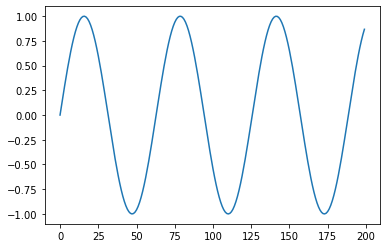

In [2]:
series = np.sin(0.1*np.arange(200))

plt.plot(series)
plt.show

In [0]:
T = 10
X = []
Y = []

for i in range(len(series)):
  try:
    x = []
    for j in range(T):
      x.append(series[i+j])
    Y.append(series[i+T])
    X.append(x)
    
  except:
    break

# expected result =: len(X),len(Y) = (190, 190)

In [35]:
X = np.array(X).reshape(-1,T)
Y = np.array(Y)

X.shape, Y.shape

((190, 10), (190,))

In [0]:
# Sample
N = len(X)

In [0]:
# Model Building

i =  Input(shape = (T,))
x = Dense(1)(i)

model = Model(i, x)
model.compile(loss = 'mse', optimizer = Adam(learning_rate=0.01))

history = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]), verbose = 0)

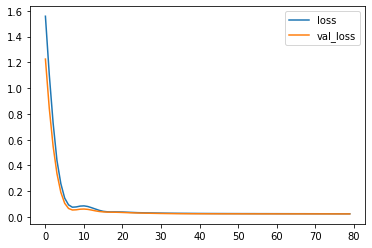

In [38]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
validation_target = Y[-N//2:]
validation_predictions = []
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

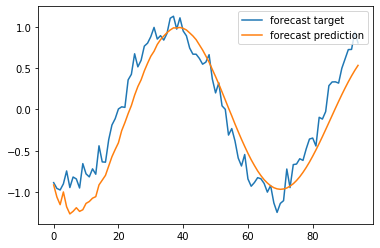

In [40]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()
plt.show()

Adding Noise

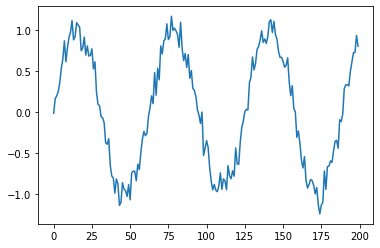

In [14]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [0]:
def plotprediction(series, T = 10):
  np.random.seed(1)
  series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
  X = []
  Y = []

  for i in range(len(series)):
    try:
      x = []
      for j in range(T):
        x.append(series[i+j])
      Y.append(series[i+T])
      X.append(x)
      
    except:
      break

  X = np.array(X).reshape(-1,T)
  Y = np.array(Y)
  N = len(X)
  print(T, X.shape, Y.shape, N)

  # Building Model
  i =  Input(shape = (T,))
  x = Dense(1)(i)
  
  model = Model(i, x)
  model.compile(loss = 'mse', optimizer = Adam(learning_rate=0.01))

  history = model.fit(X[:-N//2], Y[:-N//2], epochs=150, validation_data=(X[-N//2:], Y[-N//2:]), verbose = 0)

  #  Prediction
  validation_target = Y[-N//2:]
  validation_predictions = []
  last_x = X[-N//2]

  while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
    
    # update the predictions list
    validation_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

  plt.plot(validation_target, label='forecast target')
  plt.plot(validation_predictions, label='forecast prediction')
  plt.legend()
  # plt.show()


5 (195, 5) (195,) 195
10 (190, 10) (190,) 190
15 (185, 15) (185,) 185
20 (180, 20) (180,) 180


Text(0.5, 1.0, 'T = 20')

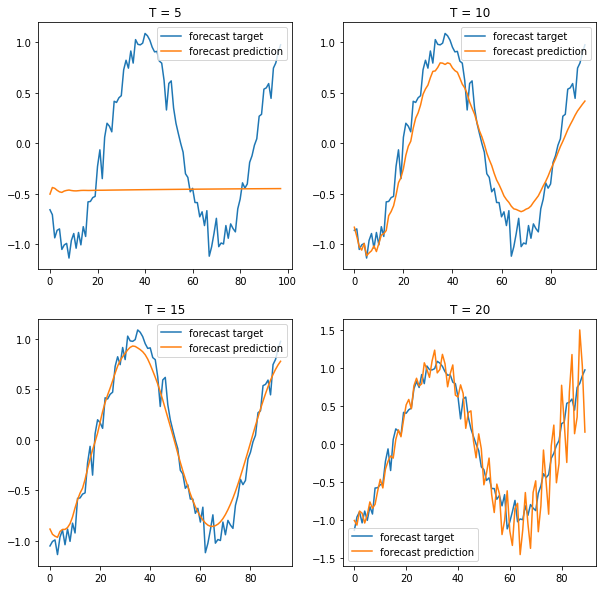

In [24]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plotprediction(series, 5)
plt.title("T = 5")
plt.subplot(2,2,2)
plotprediction(series, 10)
plt.title("T = 10")
plt.subplot(2,2,3)
plotprediction(series, 15)
plt.title("T = 15")
plt.subplot(2,2,4)
plotprediction(series, 20)
plt.title("T = 20")
